This notebook creates a group bar chart with labels comparison of 2 datasets

In [1]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
isic_df = pd.read_excel('ISIC_2019_ita_tone_stats.xlsx',index_col=0)  
print(isic_df.Counts.sum())
isic_df = isic_df.reset_index()
custom_dict = {'Very light':0, 'Light':1, 'Intermediate':2, 'Tan':3, 'Brown':4, 'Dark':5, 'Undetermined': 6}
isic_df['index'] = isic_df['Skin tone'].map(custom_dict)
isic_df = isic_df.set_index('index')
isic_df = isic_df.sort_index()
isic_df = isic_df.set_index('Skin tone')
isic_df

25331


,Counts
Skin tone,
Very light,6940
Light,7183
Intermediate,4087
Tan,3008
Brown,1746
Dark,143
Undetermined,2224


In [3]:
sd_df = pd.read_excel('SD-260_ita_tone_stats.xlsx',index_col=0)  
print(sd_df.Counts.sum())
sd_df = sd_df.reset_index()
sd_df['index'] = sd_df['Skin tone'].map(custom_dict)
sd_df = sd_df.set_index('index')
sd_df = sd_df.sort_index()
sd_df = sd_df.set_index('Skin tone')
sd_df

12582


,Counts
Skin tone,
Very light,3364
Light,3528
Intermediate,2669
Tan,1660
Brown,931
Dark,153
Undetermined,277


In [4]:
isic_df.Counts.sum()/ sd_df.Counts.sum()

2.0132729295819423

In [5]:
sd_df['Proportion'] = sd_df.Counts.apply(lambda x: round(100*x/sum(sd_df.Counts),2))
sd_df

,Counts,Proportion
Skin tone,,
Very light,3364,26.74
Light,3528,28.04
Intermediate,2669,21.21
Tan,1660,13.19
Brown,931,7.40
Dark,153,1.22
Undetermined,277,2.20


In [6]:
isic_df['Proportion'] = isic_df.Counts.apply(lambda x: round(100*x/sum(isic_df.Counts),2))
isic_df

,Counts,Proportion
Skin tone,,
Very light,6940,27.40
Light,7183,28.36
Intermediate,4087,16.13
Tan,3008,11.87
Brown,1746,6.89
Dark,143,0.56
Undetermined,2224,8.78


In [7]:
x1 = sd_df.index
y1 = sd_df.Proportion

x2 = isic_df.index
y2 = isic_df.Proportion

In [8]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

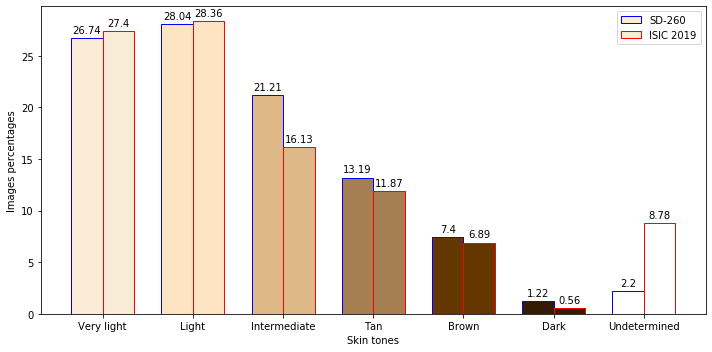

In [9]:
labels = x1
men_means = y1
women_means = y2

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Grab only the colors that appear
colors = []
mycolors = {'Very light':'antiquewhite', 'Light':'bisque', 'Intermediate':'burlywood', 'Tan':'xkcd:puce', 'Brown':'xkcd:brown', 'Dark':'xkcd:dark brown', 'Undetermined': 'white'}
for key in mycolors.keys():
    if key in labels:
        colors.append(mycolors[key])

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, men_means, width, label='SD-260', color=colors, edgecolor='blue')
rects2 = ax.bar(x + width/2, women_means, width, label='ISIC 2019',color=colors, edgecolor='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images percentages')
ax.set_xlabel('Skin tones')
#ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
fig.savefig(f'All_skin_tones_bars.png', dpi=300,bbox_inches="tight")